Makine öğrenmesi projesi genellikle şu adımları içerir:

*   veri toplama -> gerçek dünyadan örneklerin toplanması
*   veri hazırlama -> temizleme , dönüştürme , örneklerin toplanması
*   özellik belirleme -> hangi değişkenlerin kullanılacağına karar verme
*   model seçimi -> problem türüne göre uygun algoritma seçimi
*   model eğitimi -> eğitim verisiyle modeli besleme
*   değerlendirme -> test verisi ile performans ölçme
*   iyileştirme -> hata analizi , parametre ayarı , yeni veri kullanımıı

veri -> model -> tahmin -> değerlendirme -> veri..


Veriler makine öğrenimi için çok önemlidir.
  

*   eksik veriyle çalışmak
silmek ve doldurmak
1. veri seti küçükse ve eksik varsa -> doldurma

fit_transform() -> eğitim verisine göre parametreleri  öğrenir ve uygular.

*   encoding (LabelEncoder , OneHotEncoder)

1. kategorik veriler , sayısal forma dönüştürülmelidir.

(DecisionTree , LightGBM , RandomForest , XGBoost)



In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Yapay Zeka Atölye/yapay_zeka_17072025/satislar.csv")
encoder = LabelEncoder()
df['column_name'] = encoder.fit_transform(df['column_name_encoded'])

In [ ]:
import pandas as pd

df = pd.DataFrame({
    "renk" : ["sarı", "mavi", "kırmızı"]
})

one_hot = pd.get_dummies(df, columns=["renk"])
print(one_hot)


1. overfitting -> ezberleme (aynı verinin çok fazla tekrar edilmesi)
2. zaman bağlılığı : zaman serilerinde çnceki veriler eğitim , sonraki veriler test için ayrılmalı.
3. mesela 2025 için hava tahmini yapmak için önce 2023 verileri üzerinden 2024 ü , ondan sonra 2024 için 2025 tahmini yapılmalı.

stratify = y --> her değişkenin sınıf dağılımını bozulmadan eğitim ve test verisine bölünmesini sağlar.

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

df = pd.DataFrame({
    "renk" : ["sarı", "mavi", "kırmızı"]
})

encoder = OneHotEncoder()
encoded = encoder.fit_transform(df[["renk"]])

# Yeni sütun adları
columns = encoder.get_feature_names_out(["renk"])

# Sparse matris içinde çok fazla sıfır olan matrislerdir
# toarray() ile normal(dense) numpy dizisine -> içinde çok fazla sıfır olmayan matris  çevirir.
# Sparse matrix -> Numpy array dönüşümü
encoded_df = pd.DataFrame(encoded.toarray(), columns=columns)

print(encoded_df)

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

df = pd.DataFrame({
    "renk" : ["sarı", "mavi", "kırmızı"]
})

encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[["renk"]])

# Yeni sütun adları
columns = encoder.get_feature_names_out(["renk"])
encoded_df = pd.DataFrame(encoded, columns=columns)

print(encoded_df)

X: Girdi verilerini (özellikleri) içerir. df içindeki 'urun' dışındaki tüm sütunları alır.

y: Tahmin edilmek istenen hedef (etiket) verisidir. Burada 'urun' sütunu.

sütun silmek için axis=1 gerekir.

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Yapay Zeka Atölye/yapay_zeka_17072025/ogrenci_notlari.csv")

# ogrenci_id,isim ve ders kolonlarını sildik
df = df.drop(['isim', 'ders','ogrenci_id'], axis=1)

# vize ve final notu olmayan değerleri ort.değerleriyle doldurduk.
df["vize"] = df["vize"].fillna(df["vize"].mean())
df["final"] = df["final"].fillna(df["final"].mean())

#basarı notu diye yeni kolon ekledik
df["basarı_notu"] = df["vize"] * 0.4 + df["final"] * 0.6
print(df["basarı_notu"])

X = df.drop('basarı_notu', axis=1)
y = df['basarı_notu']

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['isim'] = encoder.fit_transform(df['isim'])
df["isim"]

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['ders'] = encoder.fit_transform(df['ders'])
df["ders"]

In [ ]:
print(df)

In [ ]:
print(df.info())

In [ ]:
df["vize"] = df["vize"].fillna(df["vize"].mean())
df["final"] = df["final"].fillna(df["final"].mean())
df["basarı_notu"] = df["basarı_notu"].fillna(df["basarı_notu"].mean())

In [ ]:
print(df)

In [ ]:
print(df.info())

bir model, eğitim verisinden örüntüleri öğrenir.
1. model.fit(X_train , y_train)

öğrendikten sonta , test verisinde tahmin edilir.
2. model.predict(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

In [ ]:
print(df)

In [ ]:
for gerçek, tahmin in zip(y_test[:10], y_pred[:10]):
    print(f"Gerçek: {gerçek}, Tahmin: {tahmin}")


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R2 Skoru:", r2)

bunlar logistic regresyon için geçerlidir.
model değerlendirme metrikleri

*   Accuracy(doğruluk) -> doğru tahmin sayısı / toplam tahmin sayısı
*   precision(kesinlik) -> pozitif tahminlerin ne kadarı gerçekten pz(+)
*   recall(duyarlılık) -> gerçek pozitiflerin ne kadarı tahmin edildi?
*   F1 score -> precison and recall un dengeli ortalaması
*   confusion matrix -> gerçek vs. tahmin edilen sınıfların sayısal tablosu

accuracy = TP + TN / TP + FP + TN + FN

precision = TP / TP + FP

recall = TP / TP + FN

F1 score = 2 * precision * recall / precision + recall



                      tahmin(pozitif)       tahmin(negatif)

gerçek(pozitif)           TP                    FN

gerçek(negatif)           NP                    FN





In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix , classification_report

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n"), class_report

başarısız model performansının nedenleri;


*   yanlış model seçimi
*   overfitting - underfitting durumu
*   hiperparamtere ayarı (grid search , random search)

makine algoritma çeşitleri;

1. regresyon
    * lineer regresyon --->  y = ax + b
    * polynomial regresyon  ---> y = ax2 + bx + c
    * decision tree regresyon
    * logistic regresyon ---> ikili sınıflandırma için kullanılır --> sonucları **sigmoid fonk.** ile sınırlar
2. sınıflandırma
    * K-NN --> yeni gelen verinin sınıfını en yakın K veri noktasına bakarak belirler
    * support vector machine (svm)
    * decision tree --> veriyi if/else kurallarıyla dallara ayırır.
    * random forest --> arka planda birden fazla karar ağacı çalışır. oylama sonucu seçim yapılır
    * naive bayes
3. kümeleme
    * k-means
    * hiererchical clustering
    * density-based spatail clustering



442 hasta , 10 özellik
* [satır , sütun]
* [satır1 : satır2 , sütun1 : sütun2]

In [ ]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

print(X.shape)
print(diabetes.feature_names)

(442, 10)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


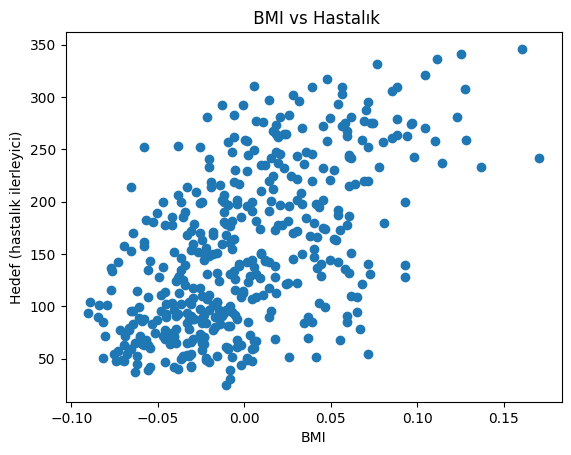

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:,2],y)
plt.xlabel("BMI")
plt.ylabel("Hedef (hastalık ilerleyici)")
plt.title(" BMI vs Hastalık")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("R2 Skoru:", r2)
print("MSE:", mse)
print("MAE:", mae)

R2 Skoru: 0.4526027629719195
MSE: 2900.193628493482
MAE: 42.79409467959994


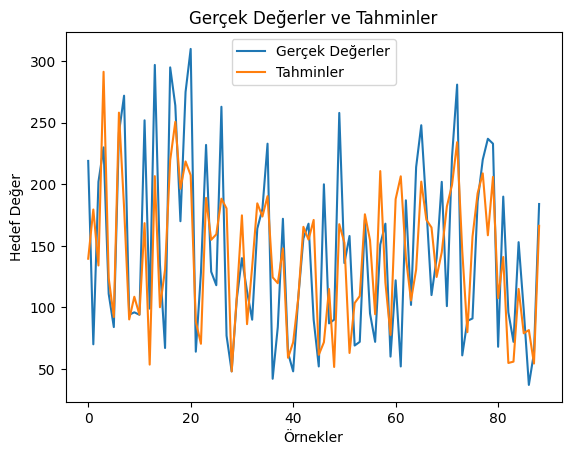

In [ ]:
plt.plot(y_test, label="Gerçek Değerler")
plt.plot(y_pred, label="Tahminler")
plt.legend()
plt.xlabel("Örnekler")
plt.ylabel("Hedef Değer")
plt.title("Gerçek Değerler ve Tahminler")
plt.show()

In [24]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y_true = iris.target
feature_names = iris.feature_names

In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
labels_kmeans = kmeans.fit_predict(X)

In [22]:
from sklearn.decomposition import PCA

# 4 boyutlu veriler , 2 boyuta indirger
# amaç ; kümeleme sonuçlarını görsel olarak karşılastırmak
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

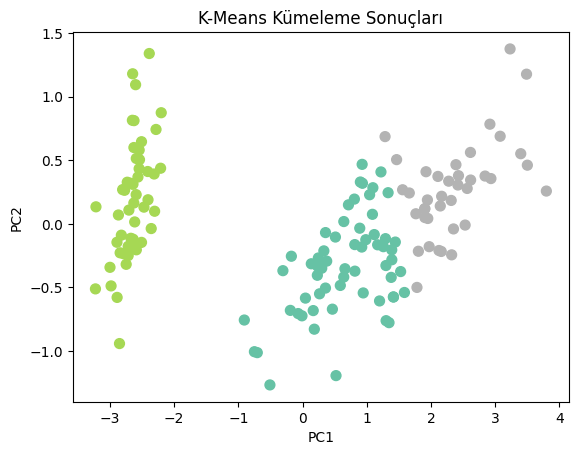

In [23]:
import matplotlib.pyplot as plt

def plot_clusters(title , labels):
  plt.scatter(X_pca[:,0], X_pca[:,1], c=labels , cmap = "Set2" , s=50)
  plt.title(title)
  plt.xlabel("PC1")
  plt.ylabel("PC2")
  plt.show()

plot_clusters("K-Means Kümeleme Sonuçları", labels_kmeans)

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , confusion_matrix , ConfusionMatrixDisplay

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [36]:
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
models ={
    "Logistic Regression" : LogisticRegression(max_iter=1000),
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "Support Vector Machine" : SVC(),
    "K-Nearest Neighbors" : KNeighborsClassifier()
}

In [38]:
results = []
for name , model in models.items():
  model.fit(X_train_scaled , y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test , y_pred)
  results.append((name , accuracy))

                    Model  Doğruluk skoru
3  Support Vector Machine        0.982456
0     Logistic Regression        0.973684
2           Random Forest        0.964912
4     K-Nearest Neighbors        0.947368
1           Decision Tree        0.938596


/tmp/ipython-input-39-2688423619.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Doğruluk skoru", data=result_df , palette= "Set2")


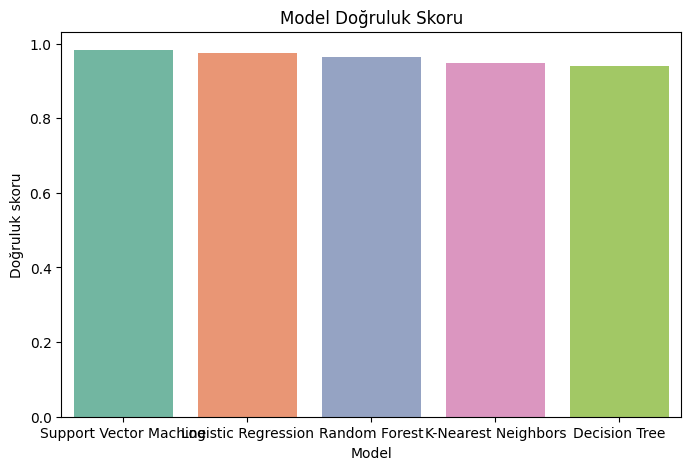

In [39]:
result_df = pd.DataFrame(results , columns=["Model", "Doğruluk skoru"]).sort_values(by="Doğruluk skoru", ascending=False)
print(result_df)

plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Doğruluk skoru", data=result_df , palette= "Set2")
plt.xlabel("Model")
plt.ylabel("Doğruluk skoru")
plt.title("Model Doğruluk Skoru")
plt.show()